In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import folium
import gpxpy.geo
from datetime import datetime
import time
import seaborn as sns
import os
import math
import xgboost as xgb
os.chdir("/Users/liupengfei/Downloads/nyc2014")

In [2]:
yellow = pd.read_csv("yellow_data.csv")


In [3]:
green = pd.read_csv("green_data.csv")


In [4]:
uber =pd.read_csv("uber_data.csv")

In [5]:
data = pd.concat([yellow, green, uber], axis=0)
data.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Lat,Lon,Unnamed: 0,dropoff_datetime,pickup_datetime,trip_distance,trip_duration,type
0,40.771,-73.866,0,2014-06-03 13:04:00 UTC,2014-06-03 12:42:00 UTC,10.03,1320.0,yellow
1,40.774,-73.871,1,2014-07-25 13:26:00 UTC,2014-07-25 12:48:00 UTC,9.85,2280.0,yellow
2,40.703,-73.927,2,2014-07-25 09:24:00 UTC,2014-07-25 09:04:00 UTC,8.49,1200.0,yellow
3,40.769,-73.863,3,2014-05-19 13:19:00 UTC,2014-05-19 12:47:00 UTC,9.18,1920.0,yellow
4,40.774,-73.874,4,2014-05-27 15:19:00 UTC,2014-05-27 14:44:00 UTC,13.26,2100.0,yellow


In [6]:
data.drop('Unnamed: 0', axis =1, inplace=True)

In [7]:
data.head()

,Lat,Lon,dropoff_datetime,pickup_datetime,trip_distance,trip_duration,type
0,40.771,-73.866,2014-06-03 13:04:00 UTC,2014-06-03 12:42:00 UTC,10.03,1320.0,yellow
1,40.774,-73.871,2014-07-25 13:26:00 UTC,2014-07-25 12:48:00 UTC,9.85,2280.0,yellow
2,40.703,-73.927,2014-07-25 09:24:00 UTC,2014-07-25 09:04:00 UTC,8.49,1200.0,yellow
3,40.769,-73.863,2014-05-19 13:19:00 UTC,2014-05-19 12:47:00 UTC,9.18,1920.0,yellow
4,40.774,-73.874,2014-05-27 15:19:00 UTC,2014-05-27 14:44:00 UTC,13.26,2100.0,yellow


In [8]:
data.tail()

,Lat,Lon,dropoff_datetime,pickup_datetime,trip_distance,trip_duration,type
4534322,40.7668,-73.9845,NaN,2014-09-30-22,NaN,NaN,uber
4534323,40.6911,-74.1773,NaN,2014-09-30-22,NaN,NaN,uber
4534324,40.8519,-73.9319,NaN,2014-09-30-22,NaN,NaN,uber
4534325,40.7081,-74.0066,NaN,2014-09-30-22,NaN,NaN,uber
4534326,40.7140,-73.9496,NaN,2014-09-30-22,NaN,NaN,uber


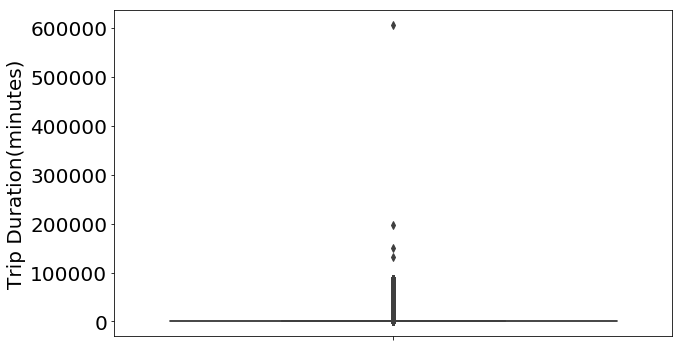

In [9]:
#Trip Durations
plt.figure(figsize = (10,6))
sns.boxplot("trip_duration", data = data, orient = "v")
plt.tick_params(labelsize = 20)
plt.ylabel("Trip Duration(minutes)", fontsize = 20)
plt.show()

In [10]:
quant_tripDuration = data.trip_duration.quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

In [11]:
values = np.round(np.arange(0.00, 1.01, 0.1), 2)
for i in values:
    print("{}th percentile value of Trip Duration is {}min".format((int(i*100)), quant_tripDuration[i]))


0th percentile value of Trip Duration is 1.0min
10th percentile value of Trip Duration is 240.0min
20th percentile value of Trip Duration is 350.0min
30th percentile value of Trip Duration is 431.0min
40th percentile value of Trip Duration is 540.0min
50th percentile value of Trip Duration is 651.0min
60th percentile value of Trip Duration is 780.0min
70th percentile value of Trip Duration is 936.0min
80th percentile value of Trip Duration is 1153.0min
90th percentile value of Trip Duration is 1560.0min
100th percentile value of Trip Duration is 606597.0min


In [12]:
values = np.round(np.arange(0.90, 1.01, 0.01), 2)
for i in values:
    print("{} percentile value of Trip Duration is {}min".format((int(i*100)), quant_tripDuration[i]))

90 percentile value of Trip Duration is 1560.0min
91 percentile value of Trip Duration is 1620.0min
92 percentile value of Trip Duration is 1680.0min
93 percentile value of Trip Duration is 1753.0min
94 percentile value of Trip Duration is 1860.0min
95 percentile value of Trip Duration is 1970.0min
96 percentile value of Trip Duration is 2100.0min
97 percentile value of Trip Duration is 2283.0min
98 percentile value of Trip Duration is 2578.0min
99 percentile value of Trip Duration is 3060.0min
100 percentile value of Trip Duration is 606597.0min


In [13]:
quant_tripDuration = data.trip_duration.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
values = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in values:
    print("{} percentile value of trip duration is {}miles".format((i*100), quant_tripDuration[i]))

99.1 percentile value of trip duration is 3143.0miles
99.2 percentile value of trip duration is 3240.0miles
99.3 percentile value of trip duration is 3343.0miles
99.4 percentile value of trip duration is 3464.0miles
99.5 percentile value of trip duration is 3600.0miles
99.6 percentile value of trip duration is 3781.0miles
99.7 percentile value of trip duration is 4048.635000001639miles
99.8 percentile value of trip duration is 4473.0miles
99.9 percentile value of trip duration is 5798.0miles
100.0 percentile value of trip duration is 606597.0miles


In [14]:
data1 = data[(data.trip_duration>1) & (data.trip_duration<6000)]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


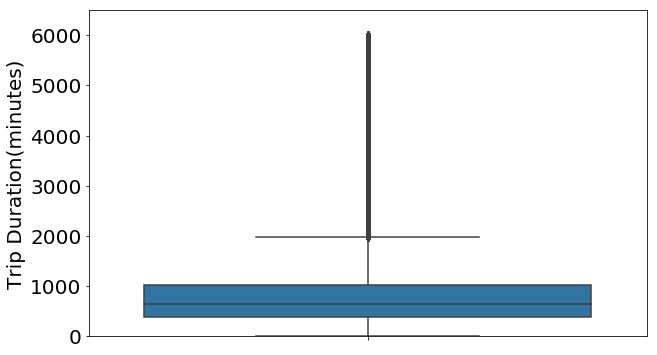

In [15]:
plt.figure(figsize = (10,6))
sns.boxplot("trip_duration", data = data1, orient = "v")
plt.ylim(ymin = 1, ymax = 6500)
plt.tick_params(labelsize = 20)
plt.ylabel("Trip Duration(minutes)", fontsize = 20)
plt.show()

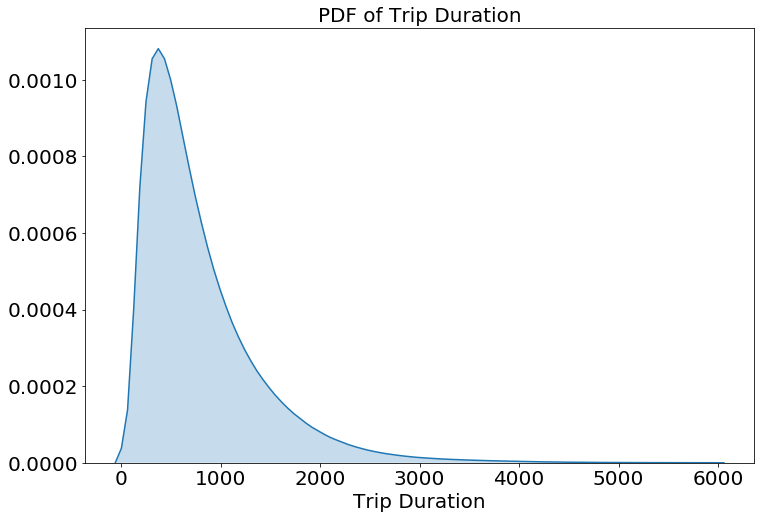

In [16]:
plt.figure(figsize = (12,8))
sns.kdeplot(data1["trip_duration"].values, shade = True, cumulative = False)
plt.tick_params(labelsize = 20)
plt.xlabel("Trip Duration", fontsize = 20)
plt.title("PDF of Trip Duration", fontsize = 20)
plt.show()

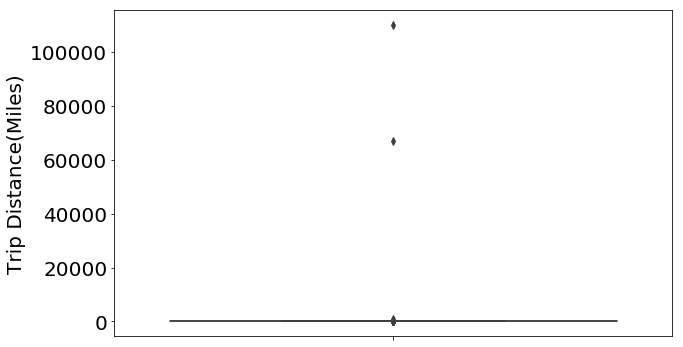

In [17]:
#Trip Distance
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot("trip_distance", data = data1, orient = "v")
plt.tick_params(labelsize = 20)
plt.ylabel("Trip Distance(Miles)", fontsize = 20)
plt.show()

In [18]:
quant_tripDistance = data1.trip_distance.quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

In [19]:
values = np.round(np.arange(0.00, 1.01, 0.1), 2)
for i in values:
    print("{}th percentile value of trip distance is {}miles".format(int(i*100), quant_tripDistance[i]))

0th percentile value of trip distance is 0.01miles
10th percentile value of trip distance is 0.7miles
20th percentile value of trip distance is 1.0miles
30th percentile value of trip distance is 1.24miles
40th percentile value of trip distance is 1.54miles
50th percentile value of trip distance is 1.9miles
60th percentile value of trip distance is 2.4miles
70th percentile value of trip distance is 3.1miles
80th percentile value of trip distance is 4.2miles
90th percentile value of trip distance is 6.699999999999999miles
100th percentile value of trip distance is 110050.4miles


In [20]:
values = np.round(np.arange(0.91, 1.01, 0.01), 3)
for i in values:
    print("{} percentile value of trip distance is {}miles".format(int(i*100), quant_tripDistance[i]))

91 percentile value of trip distance is 7.15miles
92 percentile value of trip distance is 7.69miles
93 percentile value of trip distance is 8.3miles
94 percentile value of trip distance is 9.0miles
95 percentile value of trip distance is 9.76miles
96 percentile value of trip distance is 10.66miles
97 percentile value of trip distance is 11.97miles
98 percentile value of trip distance is 14.85miles
99 percentile value of trip distance is 17.8miles
100 percentile value of trip distance is 110050.4miles


In [21]:
quant_tripDistance = data1.trip_distance.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
values = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in values:
    print("{} percentile value of trip distance is {}miles".format((i*100), quant_tripDistance[i]))

99.1 percentile value of trip distance is 18.01miles
99.2 percentile value of trip distance is 18.26miles
99.3 percentile value of trip distance is 18.5miles
99.4 percentile value of trip distance is 18.8miles
99.5 percentile value of trip distance is 19.2miles
99.6 percentile value of trip distance is 19.68miles
99.7 percentile value of trip distance is 20.3miles
99.8 percentile value of trip distance is 21.1miles
99.9 percentile value of trip distance is 22.4miles
100.0 percentile value of trip distance is 110050.4miles


In [22]:
data1 = data1[(data1.trip_distance>0) & (data1.trip_distance<30)]

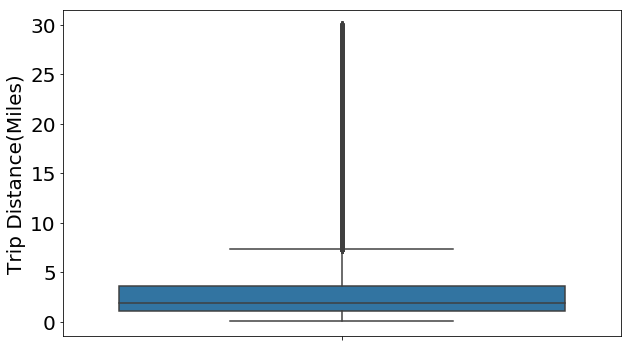

In [23]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot("trip_distance", data = data1, orient = "v")
plt.tick_params(labelsize = 20)
plt.ylabel("Trip Distance(Miles)", fontsize = 20)
plt.show()


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter('ignore')

In [25]:
coord = data1[['Lat','Lon']].values

                    

In [26]:
def get_regions(numsofRegions):
    regions = MiniBatchKMeans(n_clusters = numsofRegions, batch_size=10000).fit(coord)
    regioncenter = regions.cluster_clusters_
    clusters = len(regioncenter)
    return regioncenter, clusters

In [27]:
regions = MiniBatchKMeans(n_clusters =30, batch_size =10000).fit(coord)
data1['pickup_clusters'] =regions.predict(data1[['Lat','Lon']])

In [28]:
data1.head()

,Lat,Lon,dropoff_datetime,pickup_datetime,trip_distance,trip_duration,type,pickup_clusters
0,40.771,-73.866,2014-06-03 13:04:00 UTC,2014-06-03 12:42:00 UTC,10.03,1320.0,yellow,16
1,40.774,-73.871,2014-07-25 13:26:00 UTC,2014-07-25 12:48:00 UTC,9.85,2280.0,yellow,16
2,40.703,-73.927,2014-07-25 09:24:00 UTC,2014-07-25 09:04:00 UTC,8.49,1200.0,yellow,26
3,40.769,-73.863,2014-05-19 13:19:00 UTC,2014-05-19 12:47:00 UTC,9.18,1920.0,yellow,16
4,40.774,-73.874,2014-05-27 15:19:00 UTC,2014-05-27 14:44:00 UTC,13.26,2100.0,yellow,16


In [28]:
data1.to_csv("nyc2014_data.csv")

In [29]:
centerofRegions = regions.cluster_centers_
numsofClusters = len(centerofRegions)
m = folium.Map(location =[40.9176,-73.7004], tiles = "Stamen Toner")

for i in range(numsofClusters):
    folium.Marker([centerofRegions[i][0], centerofRegions[i][1]], popup =(str(np.round(centerofRegions[i][0], 2))+", "+str(np.round(centerofRegions[i][1], 2)))).add_to(m)
m

In [30]:
y = data1[data1['type']=='yellow']
g = data1[data1['type']== 'green']


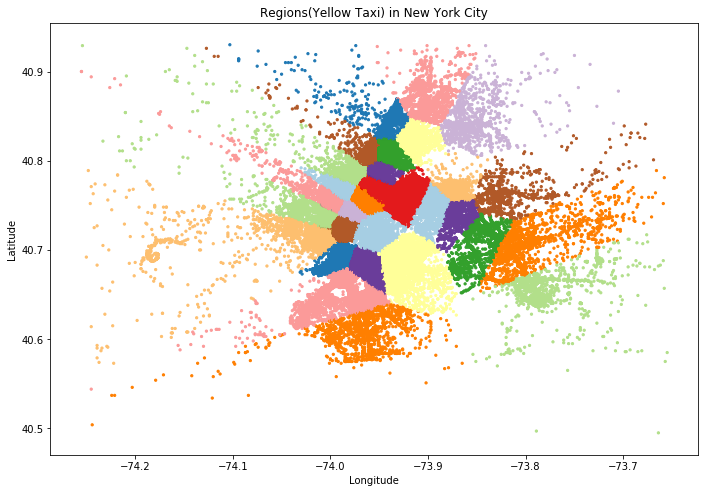

In [32]:
NYC_latitude_range = (40.5774, 40.9176)
NYC_Longitude_range = (-74.15, -73.7004)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.scatter(x = y.Lon.values, y = y.Lat.values, c = y.pickup_clusters.values, cmap = "Paired", s = 5)
#ax.set_xlim(-74.10, -73.72)
#ax.set_ylim(40.5774, 40.9176)
ax.set_title("Regions(Yellow Taxi) in New York City")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

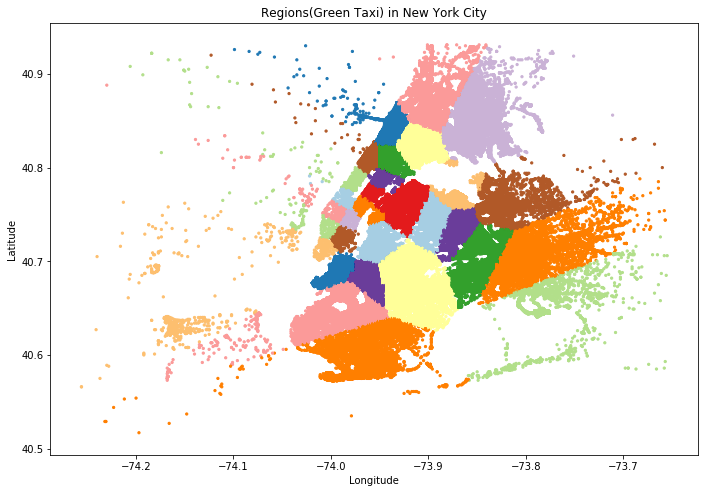

In [31]:
NYC_latitude_range = (40.5774, 40.9176)
NYC_Longitude_range = (-74.15, -73.7004)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.scatter(x = g.Lon.values, y = g.Lat.values, c = g.pickup_clusters.values, cmap = "Paired", s = 5)
#ax.set_xlim(-74.10, -73.72)
#ax.set_ylim(40.5774, 40.9176)
ax.set_title("Regions(Green Taxi) in New York City")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [35]:
uber = data[data['type']=='uber']
uber.head()

,Lat,Lon,dropoff_datetime,pickup_datetime,trip_distance,trip_duration,type
0,40.7690,-73.9549,NaN,2014-04-01-00,NaN,NaN,uber
1,40.7267,-74.0345,NaN,2014-04-01-00,NaN,NaN,uber
2,40.7316,-73.9873,NaN,2014-04-01-00,NaN,NaN,uber
3,40.7588,-73.9776,NaN,2014-04-01-00,NaN,NaN,uber
4,40.7594,-73.9722,NaN,2014-04-01-00,NaN,NaN,uber


In [36]:
u_coord = uber[['Lat','Lon']].values
regions = MiniBatchKMeans(n_clusters =30, batch_size =10000).fit(u_coord)
uber['pickup_clusters'] =regions.predict(uber[['Lat','Lon']])

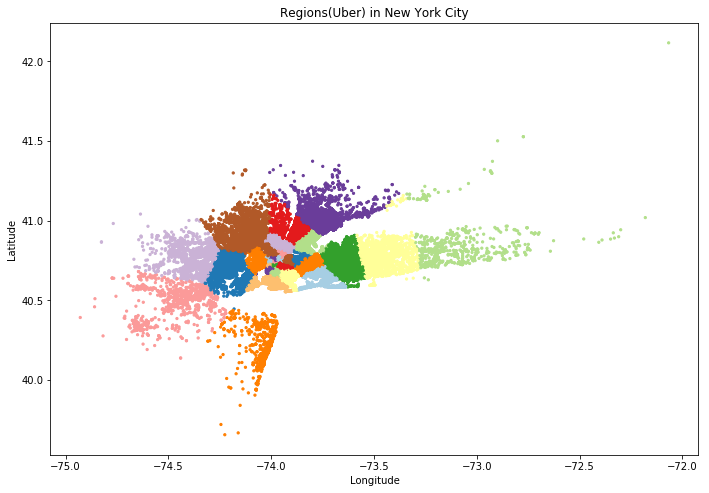

In [37]:
NYC_latitude_range = (40.5774, 40.9176)
NYC_Longitude_range = (-74.15, -73.7004)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.scatter(x = uber.Lon.values, y = uber.Lat.values, c = uber.pickup_clusters.values, cmap = "Paired", s = 5)
#ax.set_xlim(-74.10, -73.72)
#ax.set_ylim(40.5774, 40.9176)
ax.set_title("Regions(Uber) in New York City")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [50]:
y.to_csv("2014yellow.csv")
g.to_csv("2014green.csv")
u.to_csv("2014uber.csv")